# Hands-On RFM Analysis

In [40]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import datetime as dt

In [48]:
df = pd.read_excel('dummy-dataset.xlsx')
df

,id,Date,Services,Weight,Qty,Shipper/ Cust Id,Shipper Name,Receiver Name,Payment type,Amount,Pajak,Month
0,0,2020-04-01,REG,4,1,BUNK,JELLYBEE,MIMIN MINTARSIHTOKO KOSMETIK,Cash,48.0,0,April
1,1,2020-04-01,OKE,1,1,GG,GENIUSGROSIR,SUNDARI MELINDA,Cash,10.0,0,April
2,2,2020-04-01,OKE,1,1,GG,GENIUSGROSIR,RENATA,Cash,18.0,0,April
3,3,2020-04-01,OKE,7,1,GG,JICAL,IBU LALA PAK SAWIN,Cash,77.0,0,April
4,4,2020-04-01,OKE,1,1,JOPP,JULMAN HIRAWAN,HILDA IZZATI,Cash,17.0,0,April
...,...,...,...,...,...,...,...,...,...,...,...,...
14116,14116,2020-06-22,YES,1,1,EMON,EDY R,YANTI K,Cash,15.0,0,Juni
14117,14117,2020-06-22,REG,2,1,EMON,OLALA SUPER STORE,HELDA,Cash,32.0,0,Juni
14118,14118,2020-06-22,OKE,1,1,EMON,ONE D LEMON FRESH,MUHAMAD AMAR,Cash,10.0,0,Juni
14119,14119,2020-06-22,OKE,1,1,AIDA,TOKO AS,ASRI YULISTIA,Cash,11.0,0,Juni


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14121 entries, 0 to 14120
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                14121 non-null  int64         
 1   Date              14121 non-null  datetime64[ns]
 2   Services          14121 non-null  object        
 3   Weight            14121 non-null  int64         
 4   Qty               14121 non-null  int64         
 5   Shipper/ Cust Id  14121 non-null  object        
 6   Shipper Name      14121 non-null  object        
 7   Receiver Name     14121 non-null  object        
 8   Payment type      14121 non-null  object        
 9   Amount            14121 non-null  float64       
 10  Pajak             14121 non-null  int64         
 11  Month             14121 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.3+ MB


In [42]:
#mengubah tipe data menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
#Menghitung total pendapatan
df['total_amount']=df['Amount']*df['Qty']
monthly_amount=df.groupby('Month')['total_amount'].sum().reset_index()
monthly_amount.head()

,Month,total_amount
0,April,113903.5
1,Juni,115244.5
2,Mei,111354.5


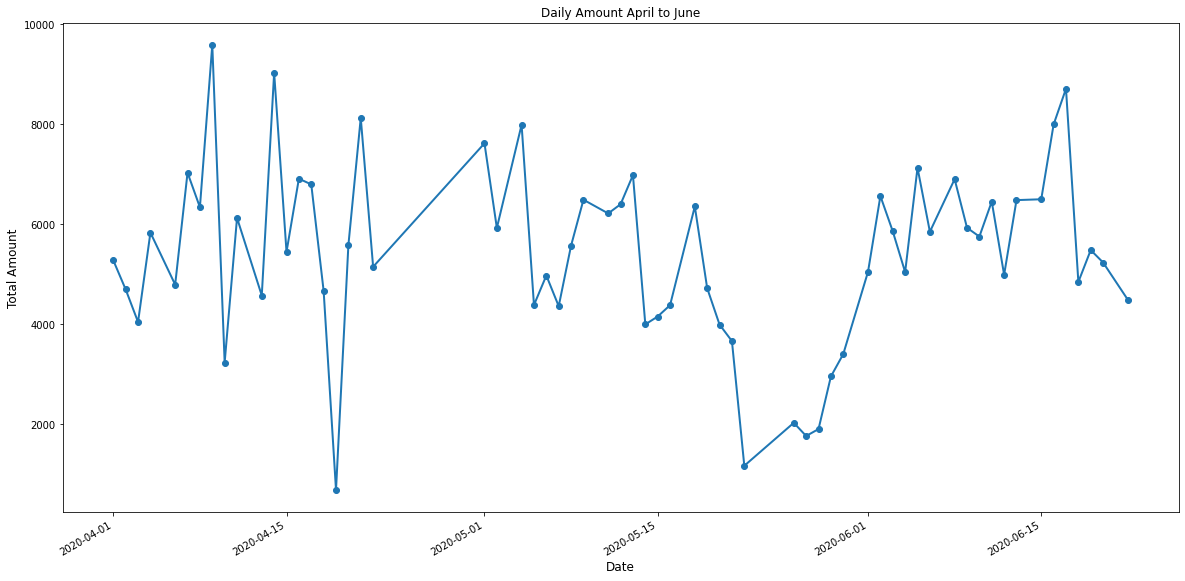

In [72]:
fig=plt.figure(figsize=(20,10))
df.groupby('Date')['total_amount'].sum().plot(marker='o',linewidth=2)
plt.title('Daily Amount April to June', loc='center')
plt.xlabel('Date',fontsize=12)
plt.ylabel('Total Amount',fontsize=12)
plt.show()

In [44]:
#Menyiapkan kolom transaksi terakhir tiap konsumen
recency_df = df.groupby(by='Shipper/ Cust Id', as_index=False)['Date'].max()
recency_df.columns = ['Cust_Id','Transaksi_akhir']
recency_df.head()

,Cust_Id,Transaksi_akhir
0,AIDA,2020-06-22
1,AKEW,2020-06-22
2,BCAT,2020-06-22
3,BJE,2020-06-22
4,BOGG,2020-06-22


In [45]:
#Menentukan datetime per-hari ini
now = dt.datetime.today()
print(now)

2021-11-27 17:50:42.341660


In [46]:
#Menghitung recency tiap konsumen
recency_df['Recency'] = recency_df['Transaksi_akhir'].apply(lambda x: (now - x).days)
recency_df.head()

,Cust_Id,Transaksi_akhir,Recency
0,AIDA,2020-06-22,523
1,AKEW,2020-06-22,523
2,BCAT,2020-06-22,523
3,BJE,2020-06-22,523
4,BOGG,2020-06-22,523


In [23]:
#Menghitung frekuensi pembelian tiap konsumen
frequency_df = df.groupby(by=['Shipper/ Cust Id'], as_index=False)['id'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,AIDA,236
1,AKEW,432
2,BCAT,1221
3,BJE,107
4,BOGG,80


In [26]:
#Menghitung monetary (pendapatan yang didapat) dari total pembelian tiap konsumen
monetary_df = df.groupby(by='Shipper/ Cust Id',as_index=False)['total_amount'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,AIDA,10284.5
1,AKEW,12776.0
2,BCAT,19226.0
3,BJE,1812.0
4,BOGG,1531.0


In [50]:
#Menggabungkan hasil hitungan RFM ke satu dataframe/tabel
recency_df.columns = ['CustomerID','Trx_akhir','Recency']
rfm_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = rfm_df.merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head()

,Trx_akhir,Recency,Frequency,Monetary
CustomerID,,,,
AIDA,2020-06-22,523,236,10284.5
AKEW,2020-06-22,523,432,12776.0
BCAT,2020-06-22,523,1221,19226.0
BJE,2020-06-22,523,107,1812.0
BOGG,2020-06-22,523,80,1531.0


In [51]:
#Menghitung nilai quantile dari kolom Recency, Frequency, Monetary
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,523.0,51.50,999.50
0.50,524.0,133.00,3788.00
0.75,548.5,395.75,13463.75


In [30]:
rfm_df=rfm_df[['Recency','Frequency','Monetary']]
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
AIDA,522,236,10284.5
AKEW,522,432,12776.0
BCAT,522,1221,19226.0
BJE,522,107,1812.0
BOGG,522,80,1531.0


In [31]:
#Membuat fungsi untuk menghitung score dari R,F,dan M
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
        
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [32]:
#Menghitung Score RFM tiap konsumen
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
AIDA,522,236,10284.5,4,3,3
AKEW,522,432,12776.0,4,4,3
BCAT,522,1221,19226.0,4,4,4
BJE,522,107,1812.0,4,2,2
BOGG,522,80,1531.0,4,2,2


In [33]:
#Menggabungkan score RFM sebagai tag pengelompokannya
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
AIDA,522,236,10284.5,4,3,3,433
AKEW,522,432,12776.0,4,4,3,443
BCAT,522,1221,19226.0,4,4,4,444
BJE,522,107,1812.0,4,2,2,422
BOGG,522,80,1531.0,4,2,2,422


In [34]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
GG,522,2837,69679.5,4,4,4,444
PNJI,522,2926,48237.0,4,4,4,444
KOSM,522,1091,28368.5,4,4,4,444
BCAT,522,1221,19226.0,4,4,4,444
BS,522,584,16852.0,4,4,4,444
BUNK,522,799,15768.0,4,4,4,444
EMON,522,546,13693.0,4,4,4,444


In [58]:
#Cek banyaknya konsumen dalam kelompok
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print("Recent Customers: ",len(rfm_segmentation[rfm_segmentation['R_Quartile']==4]))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  7
Recent Customers:  17
Loyal Customers:  9
Big Spenders:  9
Almost Lost:  1
Lost Customers:  1
Lost Cheap Customers:  4


In [59]:
others = []
for item in rfm_segmentation['RFMScore']:
    matchObj = re.search("444|244|134|111|[0-9]{1}4[0-9]{1}|[0-9]{2}4|4[0-9]{2}", item)
    if not matchObj:
        others.append(item)
print("Others: ",len(others))

Others:  11


In [68]:
#Cek id konsumen dalam setiap kelompok
print("Best Customers: ",np.array(rfm_segmentation[rfm_segmentation['RFMScore']=='444'].index))
print("Recent Customers: ",np.array(rfm_segmentation[rfm_segmentation['R_Quartile']==4].index))
print('Loyal Customers: ',np.array(rfm_segmentation[rfm_segmentation['F_Quartile']==4].index))
print("Big Spenders: ",np.array(rfm_segmentation[rfm_segmentation['M_Quartile']==4].index))
print('Almost Lost: ', np.array(rfm_segmentation[rfm_segmentation['RFMScore']=='244'].index))
print('Lost Customers: ',np.array(rfm_segmentation[rfm_segmentation['RFMScore']=='134'].index))
print('Lost Cheap Customers: ',np.array(rfm_segmentation[rfm_segmentation['RFMScore']=='111'].index))
print('Others: ',np.array(rfm_segmentation[rfm_segmentation['RFMScore'].isin(others)].index))

Best Customers:  ['BCAT' 'BS' 'BUNK' 'EMON' 'GG' 'KOSM' 'PNJI']
Recent Customers:  ['AIDA' 'AKEW' 'BCAT' 'BJE' 'BOGG' 'BRAM' 'BS' 'BUNK' 'DIEZ' 'EMON' 'GG'
 'JMOM' 'KENK' 'KOSM' 'MARA' 'PNJI' 'SLSA']
Loyal Customers:  ['AKEW' 'BCAT' 'BS' 'BUNK' 'EMON' 'GG' 'KOSM' 'PNJI' 'RTIF']
Big Spenders:  ['BCAT' 'BS' 'BUNK' 'EMON' 'GG' 'KOSM' 'NDRI' 'PNJI' 'RTIF']
Almost Lost:  ['RTIF']
Lost Customers:  ['NDRI']
Lost Cheap Customers:  ['CCDS' 'CHAM' 'PARE' 'PJUL']
Others:  ['CALL' 'CKLT' 'DADO' 'JOPP' 'KPS' 'MING' 'NOVI' 'RUKO' 'RUKO ' 'TBOX'
 'YULI']
